# Chapter 6: Convolutional Neural Networks

The invention of Convolutional Neural Networks (CNNs) has greatly improved the power of deep neural networks (DNNs). CNNs have put deep learning at the cutting edge of artificial intelligence. Because of CNNs, deep learning is now the most promising field in machine learning. 

CNNs use a different type of layers than dense layers. A convolutional layer treats an image as a two-dimensional object and finds patterns on the image. It then associates these patterns with the image labels. This greatly improves the predictive power of the model. 

In this chapter, you'll learn the basic concepts of a convolutional layer such as number of filters, kernel size, zero-padding, strides... Better yet, you'll learn to create animations to show step by step how to apply a 3 by 3 filter on a 3 by 3 image with zero-padding and a stride of 1 (as shown on the left of the animation below) and how to apply a 2 by 2 filter on a 6 by 6 image without zero-padding and with a stride of 2 (as shown on the right frame of the animation below):<br>
<img src="https://gattonweb.uky.edu/faculty/lium/ml/slide_stride.gif" />







***
$\mathbf{\text{Create a subfolder for files in Chapter 6}}$<br>
***
We'll put all files in Chapter 6 in a subfolder /files/ch06. Run the code in the cell below to create the subfolder.

***

In [1]:
import os

os.makedirs("files/ch06", exist_ok=True)

## 1. What Are Convolutional Neural Networks (CNNs)?
CNNs uses filters to find patterns on the input dataset. The CNN layer can automatically detect a large number of patterns and associate them with the target label. This is useful in both image classification and game strategy development in this book. 

Images can have complicated patterns. To make things worse, we don’t know what patterns we are looking for ex ante. 

In contrast, game boards have far fewer pixels and we can focus on certain patterns that we know are associated with game outcomes (vertical, horizontal, or diagonal lines in Tic Tac Toe and Connect Four games, for example). Therefore, I’ll use game boards to explain how CNNs work. 


Let’s say that the input data is the Tic Tac Toe game board. For simplicity let’s assume the board looks like the picture below:
<img src="https://gattonweb.uky.edu/faculty/lium/ml/ttthorizontal.PNG" />
Of course, in a real Tic Tac Toe game, payer O will take turns too so you won’t see such a board in a real game. But let’s simplify things to make the calculation easier. 
We need to convert the board into numbers so that the program can process it. Let's code a cell with X as 1, a cell with O as -1, and an empty cell as 0. 

Run the code in the cell below. 

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

inputs = np.array([[1,1,1],
                   [0,0,0],
                   [0,0,0]]).reshape(-1,3,3,1)   

We represent the board with a 3 by 3 matrix: the first row has three ones since they are occupied by Xs. The rest cells are all zero since they are all empty. 

We use *reshape(-1,3,3,1)* to reshape the matrix to a four dimensional array: the first dimension represents how many images we have; the second and third dimensions are the width and height of the image. The last dimension is the color channels. For a color picture, there are three channels (RGB), but here we put the number of channel as one for simplicity. 

Below, we'll create a horizontal filter with a size of 3 by 3. The middle row has values 1, while the other two rows have 0s. 

### 1.1. A Horizontal Filter
Below, we'll create a horizontal filter with a size of 3 by 3. The middle row has values 1, while the other two rows have 0s. 

In [3]:
# Create a horizontal filter
h_filter = np.array([[0,0,0], 
                   [1,1,1],
                   [0,0,0]]).reshape(3,3,1,1)  

A horizontal filter highlights the horizontal features in the image and blurs the rest. 
We’ll apply the 3 by 3 horizontal filter on the Tic Tac Toe game board as follows:

In [4]:
# Apply the filter on the game board
outputs = tf.nn.conv2d(inputs, h_filter, strides=1, padding="SAME")
# Convert output to numpy array and print it output
print(outputs.numpy().reshape(3,3))

[[2 3 2]
 [0 0 0]
 [0 0 0]]


In the output, the values are large in the first row. The values are all 0 in the other two rows. So the horizontal filter has correctly detected the horizontal pattern in the first row of the game board. 

But how exactly did the conv2d layer generates the output through the filter? 

First, the padding="SAME" argument in the conv2d() function means that the network add 0s around the input image. The cell below draws the iamge with zero padding.  

(-6.25, -0.75, -1.25, 4.25)

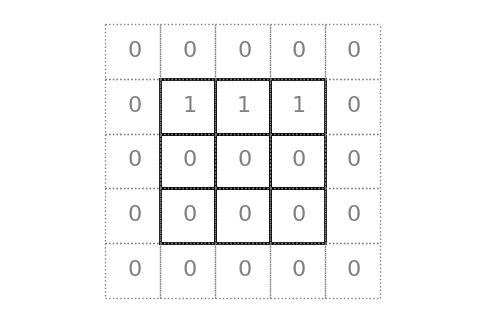

In [5]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)

def sqr(x,y,size=1, linestyle="-", color="gray", linewidth=1):
    ax.plot([x, x + size], [y, y], linestyle=linestyle, 
            color=color, linewidth=linewidth)
    ax.plot([x, x], [y + size, y], linestyle=linestyle, 
            color=color, linewidth=linewidth)
    ax.plot([x+size, x + size], [y, y + size], linestyle=linestyle, 
            color=color, linewidth=linewidth)
    ax.plot([x, x + size], [y + size, y + size], linestyle=linestyle, 
            color=color, linewidth=linewidth)
for i in range(3):
    for j in range(3):
        sqr(-5+i,j,color="k", linewidth=2)
for i in range(5):
    for j in range(5):
        sqr(-6+i,-1+j, linestyle="dotted")
        
for x in range(5):
    for y in range(5):
        if 1<=x<=3 and y==3:
            ax.text(x-5.6, y-0.6, r"1", size=16, color="gray")
        else:
            ax.text(x-5.6, y-0.6, r"0", size=16, color="gray")
ax.set_xlim(-6, -1)
ax.set_ylim(-1, 4)

plt.axis('equal')
plt.axis('off')

***
$\mathbf{\text{Kernels, Padding, and stride in a convolutional layer}}$<br>
***
* Filters are also called kernels.
* Zero-padding means we put 0s around the edges of the image. 
* Stride=1 means the filter shifts one pixel to the right or down at a time on the image. 

***

With zero-padding, the 3 by 3 image now becomes a 5 by 5 image. We then apply the 3 by 3 filter on the image. The filter will scan cover the image 9 times. We can create an animation to show how it works.

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

def scan(h,v):
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111)
    ax.set_xlim(-6, -1)
    ax.set_ylim(-1, 4)
    #ax.grid()
    plt.axis('equal')
    plt.axis('off')    
    
    def sqr(x,y,size=1, linestyle="-", color="gray", linewidth=1):
        ax.plot([x, x + size], [y, y], linestyle=linestyle, 
                color=color, linewidth=linewidth)
        ax.plot([x, x], [y + size, y], linestyle=linestyle, 
                color=color, linewidth=linewidth)
        ax.plot([x+size, x + size], [y, y + size], linestyle=linestyle, 
                color=color, linewidth=linewidth)
        ax.plot([x, x + size], [y + size, y + size], linestyle=linestyle, 
                color=color, linewidth=linewidth)   
        
    for i in range(3):
        for j in range(3):
            sqr(-5+i,j,color="k", linewidth=2)
    for i in range(5):
        for j in range(5):
            sqr(-6+i,-1+j, linestyle="dotted")         
    for x in range(5):
        for y in range(5):
            if 1<=x<=3 and y==3:
                ax.text(x-5.6, y-0.6, r"1", size=16, color="gray")
            else:
                ax.text(x-5.6, y-0.6, r"0", size=16, color="gray")
    for i in range(3):
        for j in range(3):
            sqr(-6+i+h, 1+j-v, color="r", linewidth=3)                
    plt.savefig(f"files/ch06/scan{h}{v}.png")
    plt.close(fig)

for v in range(3):
    for h in range(3):
        scan(h,v)            


import PIL
import imageio
import numpy as np

frames=[] 
for v in range(3):
    for h in range(3):
        frame=PIL.Image.open(f"files/ch06/scan{h}{v}.png")  
        frame=np.asarray(frame)
        frames.append(frame) 
imageio.mimsave('files/ch06/filter.gif', frames, fps=1) 

If you open the file filter.gif in your local folder, you'll see an animation as follows:
<img src="https://gattonweb.uky.edu/faculty/lium/ml/filter.gif"/>

### 1.2. Convoluation Operation
Now let's figure out why the output matrix in the example above is 
[[2 3 2]
 [0 0 0]
 [0 0 0]]. 
 
 When the filter is applied to the top left corner of the zero-padded image, the covered area is the red area in this picture: 
 <img src="https://gattonweb.uky.edu/faculty/lium/ml/scan00.png"/>

The covered area reprents a 3 by 3 by 1 tensor with values<br> 
   $$
\begin{bmatrix}
[[0] & [0] & [0]] \\
[[0] & [1] & [1]] \\
[[0] & [0] & [0]]
\end{bmatrix}
$$
  The filter itself is also a 3 by 3 by 1 tensor$$
\begin{bmatrix}
[[0] & [0] & [0]] \\
[[1] & [1] & [1]] \\
[[0] & [0] & [0]]
\end{bmatrix}
$$The convolution operation finds the tensor dot of the two tensors. Specifically, it perform element-wise multiplication in each of the nine cells, then adds up the values in the nine cells. like so:
 $$tensordot(\begin{bmatrix}
[[0] & [0] & [0]] \\
[[0] & [1] & [1]] \\
[[0] & [0] & [0]]
\end{bmatrix}, \begin{bmatrix}
[[0] & [0] & [0]] \\
[[1] & [1] & [1]] \\
[[0] & [0] & [0]]
\end{bmatrix})=
\begin{bmatrix}
0\times0+ & 0\times0+ & 0\times0+ \\
0\times1+ & 1\times1+ &1\times1+ \\
0\times0+ & 0\times0+ &0\times0
\end{bmatrix}=2
$$

To verify the result, we can use the *tensordot()* function in ***numpy*** to calculate output. 

In [7]:
padded_image = np.zeros((5,5))

image = np.array([[1,1,1],
    			  [0,0,0],
    			  [0,0,0]])

padded_image[1:4,1:4] = image

output = np.zeros((3,3))

filter_array = np.array([[0,0,0],
            			 [1,1,1],
            			 [0,0,0]])

for row in range(3):
    for col in range(3):
        covered_image = padded_image[row:row+3,col:col+3]
        output[row,col] = np.tensordot(filter_array, covered_image)
       
print(f"the output is\n {output}")

the output is
 [[2. 3. 2.]
 [0. 0. 0.]
 [0. 0. 0.]]


As you can see, the output is the same as what we have above.

Next, we'll create an animation on how the output matrix is generated step by step. 

In [13]:
output=np.array([[2, 3, 2],
                 [0, 0, 0],
                 [0, 0, 0]])

def slide(h,v):
    fig = plt.figure(figsize=(12,8), dpi=200)
    ax = fig.add_subplot(111)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-4, 4)
    #ax.grid()
    plt.axis("off")
    
    # Define the sqr function to draw a square
    def sqr(x,y,size=1, linestyle="-", color="gray", linewidth=1):
        ax.plot([x, x + size], [y, y], linestyle=linestyle,
                color=color, linewidth=linewidth)
        ax.plot([x, x], [y + size, y], linestyle=linestyle,
                color=color, linewidth=linewidth)
        ax.plot([x+size, x + size], [y, y + size], linestyle=linestyle, 
                color=color, linewidth=linewidth)
        ax.plot([x, x + size], [y + size, y + size], linestyle=linestyle,
                color=color, linewidth=linewidth)
    
    # Draw the original image
    for i in range(3):
        for j in range(3):
            sqr(-5+i,j, color="k", linewidth=2)
    # add text to explain 
    ax.annotate(
        'Apply a 3 by 3 filter on a 3 by 3 image\nwith zero-padding\nstride=1', 
        xy=(0,0),
        xytext = (0.02,0.1), 
        textcoords = 'axes fraction', 
        bbox = dict(boxstyle="round", fc="0.9"), 
        fontsize = 20)

    # Draw filter on the side
    for i in range(3):
        for j in range(3):
            sqr(3+i,j+1, color="r", linewidth=3)    
    ax.text(2, 2.5, "filter=", size=16, color="r")
    
    # Draw the padded image
    for i in range(5):
        for j in range(5):
            sqr(-6+i,-1+j, linestyle="dotted")
    
    # Put numbers in cells        
    for x in range(5):
        for y in range(5):
            if 1<=x<=3 and y==3:
                ax.text(x-5.6, y-0.6, r"1", size=16, color="gray")
            else:
                ax.text(x-5.6, y-0.6, r"0", size=16, color="gray")
    
    # Apply filter        
    for i in range(3):
        for j in range(3):
            sqr(-6+i+h, 1+j-v, color="r", linewidth=3) 
    
    # Draw the output matrix
    for i in range(3):
        for j in range(3):
            sqr(2+i,j-3, linewidth=2, color="k")
            ax.text(2.4+i, -0.6-j, f"{output[i,j]}", size=16, color="gray")
    
    plt.savefig(f"files/ch06/slide{h}{v}step1.png")
    # add text to explain 
    ax.annotate('', xy = (2.3+h,-0.3-v), xytext = (-3+h,4-v), 
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1))        
    ax.annotate('', xy = (2.3+h,-0.3-v), xytext = (-6+h,1-v), 
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1)) 
    plt.savefig(f"files/ch06/slide{h}{v}step2.png")
    
    ax.text(2.4+h, -0.6-v, f"{output[h,v]}", size=16, color="r")
    plt.savefig(f"files/ch06/slide{h}{v}step3.png")
    plt.close(fig)


for v in range(3):
    for h in range(3):
        slide(h,v)  

import PIL
import imageio
import numpy as np

frames=[] 
for v in range(3):
    for h in range(3):
        for step in range(1,4,1):
            frame=PIL.Image.open(f"files/ch06/slide{h}{v}step{step}.png")  
            frame=np.asarray(frame)
            frames.append(frame) 
imageio.mimsave('files/ch06/slidefilter.gif', frames, fps=2) 

You can view the animation below
<img src="https://gattonweb.uky.edu/faculty/lium/ml/slidefilter.gif"/>

### 1.3. Stride and Padding
In the example we just saw, we use zero-padding and a stride size of 1. Next, we'll discuss what if we don't use zero-padding and use a stride size greater than 1.

We'll apply a 2 by 2 diagonal filter on a 6 by 6 image without zero-padding. We'll set the stride size to 2.

In [13]:
# Create a 2 by 2 diagonal filter and a 6 by 6 image
d_filter = np.array([[1,0],
                   [0,1]]).reshape(2,2,1,1)
image = np.array([[1,0,0,1,1,0],
    			  [1,0,1,0,0,1],
    			  [0,0,0,1,1,0],
                  [0,1,1,0,1,0],
    			  [1,0,1,1,0,0],
    			  [0,1,0,0,1,0]]).reshape(-1,6,6,1)

A diagonal filter finds out and highlights the diagonal features in the image. We’ll apply it on the 6 by 6 image:

In [14]:
# Apply the filter on the image
outputs = tf.nn.conv2d(image, d_filter, strides=2, padding="VALID")
# Convert output to a numpy array and print the output
print(outputs.numpy().reshape(3,3))

[[1 0 2]
 [1 0 1]
 [2 1 0]]


Without zero-padding, we apply the 2 by 2 filter on the image, sliding 2 pixels to the right or down each time. The filter will scan over the image 9 times. We can create an animation to show how it works.

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

d_filter = np.array([[1,0],
                   [0,1]])

image = np.array([[1,0,0,1,1,0],
    			  [1,0,1,0,0,1],
    			  [0,0,0,1,1,0],
                  [0,1,1,0,1,0],
    			  [1,0,1,1,0,0],
    			  [0,1,0,0,1,0]])

outputs = np.array([[1, 0, 2],
                     [1, 0, 1],
                     [2, 1, 0]])


def scan(h,v):
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111)
    
    def sqr(x,y,size=1, linestyle="-", color="gray", linewidth=1):
        ax.plot([x, x + size], [y, y], linestyle=linestyle, 
                color=color, linewidth=linewidth)
        ax.plot([x, x], [y + size, y], linestyle=linestyle, 
                color=color, linewidth=linewidth)
        ax.plot([x+size, x + size], [y, y + size], linestyle=linestyle, 
                color=color, linewidth=linewidth)
        ax.plot([x, x + size], [y + size, y + size], linestyle=linestyle, 
                color=color, linewidth=linewidth)
    
    # Draw the 6 by 6 image 
    for i in range(6):
        for j in range(6):
            sqr(-6+i,-2+j)
            ax.text(i-5.6, 3.4-j, image[j,i], size=16, color="gray")
    
    # Draw the filter       
    for i in range(2):
        for j in range(2):
            sqr(-6+i+2*h, 2+j-2*v, color="b", linewidth=2)         
    
    ax.set_xlim(-6, 0)
    ax.set_ylim(-2, 4)
    #ax.grid()
    plt.axis('equal')
    plt.axis('off')
    plt.savefig(f"files/ch06/stride{h}{v}.png")
    plt.close(fig)
    
for v in range(3):
    for h in range(3):
        scan(h,v) 
        
        
import PIL
import imageio
import numpy as np

frames=[] 
for v in range(3):
    for h in range(3):
        frame=PIL.Image.open(f"files/ch06/stride{h}{v}.png")  
        frame=np.asarray(frame)
        frames.append(frame) 
imageio.mimsave('files/ch06/stride.gif', frames, fps=1)      

If you open the file filter.gif in your local folder, you'll see an animation as follows:
<img src="https://gattonweb.uky.edu/faculty/lium/ml/stride.gif"/>

Next, we'll create an animation on how the output matrix is generated step by step. 

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

d_filter = np.array([[1,0],
                   [0,1]])

image = np.array([[1,0,0,1,1,0],
    			  [1,0,1,0,0,1],
    			  [0,0,0,1,1,0],
                  [0,1,1,0,1,0],
    			  [1,0,1,1,0,0],
    			  [0,1,0,0,1,0]])

output = np.array([[1, 0, 2],
                     [1, 0, 1],
                     [2, 1, 0]])



def stride(h,v):
    fig = plt.figure(figsize=(12,8), dpi=200)
    ax = fig.add_subplot(111)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-4, 4)
    #ax.grid()
    plt.axis("off")
    
    # Define the sqr function to draw square
    def sqr(x,y,size=1, linestyle="-", color="gray", linewidth=1):
        ax.plot([x, x + size], [y, y], linestyle=linestyle,
                color=color, linewidth=linewidth)
        ax.plot([x, x], [y + size, y], linestyle=linestyle,
                color=color, linewidth=linewidth)
        ax.plot([x+size, x + size], [y, y + size], linestyle=linestyle, 
                color=color, linewidth=linewidth)
        ax.plot([x, x + size], [y + size, y + size], linestyle=linestyle,
                color=color, linewidth=linewidth)
    
    # Draw the 6 by 6 image 
    for i in range(6):
        for j in range(6):
            sqr(-6+i,-2+j,linewidth=2)
            ax.text(i-5.6, 3.4-j, image[j,i],size=16, color="gray")
            
    # add text to explain 
    ax.annotate(
        'Apply a 2 by 2 filter on a 6 by 6 image\nwithout zero-padding\nstride=2', 
        xy=(0,0),
        xytext = (0.02,0.05), 
        textcoords = 'axes fraction', 
        bbox = dict(boxstyle="round", fc="0.9"), 
        fontsize = 20)

    # Draw a filter on the side
    ax.text(2.8,2.8, "filter=", size=20, color="b")
    for i in range(2):
        for j in range(2):
            sqr(4+i,2+j, color="b", linewidth=3)
            ax.text(4.4+i, 2.4+j, d_filter[i,j], size=16, color="b")      


    # Apply filter        
    for i in range(2):
        for j in range(2):
            sqr(-6+i+2*h, 2+j-2*v, color="b", linewidth=3)    
    
    # Draw the output matrix
    for i in range(3):
        for j in range(3):
            sqr(2+i,j-3, linewidth=2, color="k")
            ax.text(2.4+i, -0.6-j, f"{output[j,i]}", size=16, color="gray")
    
    plt.savefig(f"files/ch06/stride{h}{v}step1.png")
    # add text to explain 
  
    ax.annotate('', xy = (2.3+h,-0.3-v), xytext = (-8+i+2*h, j-2*v), 
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1))        
    ax.annotate('', xy = (2.3+h,-0.3-v), xytext = (-6+i+2*h, 2+j-2*v), 
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1)) 
    plt.savefig(f"files/ch06/stride{h}{v}step2.png")
    
    ax.text(2.4+h, -0.6-v, f"{output[v,h]}", size=16, color="b")
    plt.savefig(f"files/ch06/stride{h}{v}step3.png")
    plt.close(fig)


for v in range(3):
    for h in range(3):
        stride(h,v)  

import PIL
import imageio
import numpy as np

frames=[] 
for v in range(3):
    for h in range(3):
        for step in range(1,4,1):
            frame=PIL.Image.open(f"files/ch06/stride{h}{v}step{step}.png")  
            frame=np.asarray(frame)
            frames.append(frame) 
imageio.mimsave('files/ch06/stridesteps.gif', frames, fps=2) 

You can view the animation below
<img src="https://gattonweb.uky.edu/faculty/lium/ml/stridesteps.gif"/>

### 1.4. Combine the Two Animations
Next, you'll put the two animations side by side in one single animation.

In [16]:
frames=[] 
for v in range(3):
    for h in range(3):
        for step in range(1,4,1):
            frame1=PIL.Image.open(f"files/ch06/slide{h}{v}step{step}.png")  
            frame1=np.asarray(frame1)

            frame2=PIL.Image.open(f"files/ch06/stride{h}{v}step{step}.png")  
            frame2=np.asarray(frame2)
            
            frame=np.concatenate([frame1, frame2], axis =1)
            frames.append(frame) 
imageio.mimsave('files/ch06/slide_stride.gif', frames, fps=2) 

The resulting animation works as follows:<br>
<img src="https://gattonweb.uky.edu/faculty/lium/ml/slide_stride.gif" />

## 2. Max Pooling
After we process the images with convolutional layers, we can also use the MaxPooling2D layer to furtherer highlight patterns by taking the maximum value over an input window. 

Recall that in the last section, after we apply a 2 by 2 diagonal filter on a 6 by 6 image, the output is a 3 by 3 matrix in the form of [[1, 0, 2],
                     [1, 0, 1],
                     [2, 1, 0]].
                     
We can apply a max_pool2d layer on the output, with a filter size of 2 by 2, a stride size of 1, without zero-padding, like so:                
                     

In [18]:


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Create a 2 by 2 diagonal filter and a 6 by 6 image
d_filter = np.array([[1,0],
                   [0,1]]).reshape(2,2,1,1)
image = np.array([[1,0,0,1,1,0],
    			  [1,0,1,0,0,1],
    			  [0,0,0,1,1,0],
                  [0,1,1,0,1,0],
    			  [1,0,1,1,0,0],
    			  [0,1,0,0,1,0]]).reshape(-1,6,6,1)
 
# Apply the filter on the image
outputs = tf.nn.conv2d(image, d_filter, strides=2, padding="VALID")
# Convert output to a numpy array and print the output
print("the output after the conv2d layer is \n", \
      outputs.numpy().reshape(3,3))

pooled_outputs = tf.nn.max_pool2d(input=outputs,\
                 ksize=2, strides=1, padding="VALID")

print("the output after the max_pool2d layer is \n", \
      pooled_outputs.numpy().reshape(2,2))


the output after the conv2d layer is 
 [[1 0 2]
 [1 0 1]
 [2 1 0]]
the output after the max_pool2d layer is 
 [[1 2]
 [2 1]]


It works as follows: 
* the 2 by 2 max_pool2d filter first scans the top left corner of the output matrix, which covers four numbers  [[1, 0], [1, 0]]. The maximum number among the four cells is 1, hence the value 1 in the top left corner of the pooled_outputs matrix. 
* the 2 by 2 max_pool2d filter then scans the top right corner of the output matrix, which covers four numbers  [[0, 2], [0, 1]]. The maximum number among the four cells is 2, hence the value 2 in the top right corner of the pooled_outputs matrix. 
* the 2 by 2 max_pool2d filter scans the bottom left corner of the output matrix, which covers four numbers  [[1, 0], [2, 1]]. The maximum number among the four cells is 2, hence the value 2 in the bottom left corner of the pooled_outputs matrix. 
* the 2 by 2 max_pool2d filter finally scans the bottom right corner of the output matrix, which covers four numbers  [[0, 1], [1, 0]]. The maximum number among the four cells is 1, hence the value 1 in the bottom right corner of the pooled_outputs matrix. 

## 3. Binary Classification with Convolutional Layers
Now that you know how convolutional layers work, we’ll apply them (along with max pooling layers) to the binary classification problem outlined in Chapter 5. 

To compare apples with apples, we'll use the same input data. We'll compare the confusion matrix as well as the accuracy scores. 

In [37]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1 = unpickle("files/cifar10/cifar-10-batches-py/data_batch_1")

# Must put b in front of the keys since they are bits literal
data = batch1[b"data"]
labels = batch1[b'labels']

# Keep deer and horses only
# Change y to a dummy of 1 (horse) or 0 (deer)
X=[]
y=[]
for i in range(1000):
    if labels[i]==4:
        X.append(data[i])
        y.append(0)
    if labels[i]==7:
        X.append(data[i])
        y.append(1)
        
# Reshape X
X = np.array(X, dtype=float)
# change channel first to channel last
X = X.reshape(-1,3,32,32).transpose(0,2,3,1)
# Change an integer to a float between 0 and 1
X = X/255
# Reshpae y
y = np.array(y, dtype=float).reshape(-1,)

#Split train data for cross validation
x_train,x_test,y_train,y_test = train_test_split\
    (X,y,test_size=0.2,random_state=0)

# Use only the first channel to reduce data size
X_train = x_train[:,:,:,0].reshape(-1,32,32,1)
X_test = x_test[:,:,:,0].reshape(-1,32,32,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Training the model
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(0)
dnn = tf.keras.Sequential()
dnn.add(layers.Conv2D(filters=64, kernel_size=(3,3),\
                      activation="relu", input_shape=(32,32,1)))
dnn.add(layers.MaxPooling2D(pool_size=(2,2)))
dnn.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
dnn.add(layers.MaxPooling2D(pool_size=(2,2)))
dnn.add(layers.Flatten())
dnn.add(layers.Dense(units=128, activation="relu"))
dnn.add(layers.Dropout(rate=0.2))
dnn.add(layers.Dense(1, activation='sigmoid'))
dnn.compile(optimizer="adam", 
            loss="binary_crossentropy",
            metrics=["accuracy"])
hist = dnn.fit(X_train, y_train, 
                  validation_data=(X_test, y_test),
                  verbose=0, epochs=125)
dnn.save('files/ch06/binary_conv.h5')

(160, 32, 32, 1)
(41, 32, 32, 1)
(160,)
(41,)


Note that I have also added in a dropout layer to control for overfitting.

Now that the model is trained, we can look at the accuracy of the model during the training process.

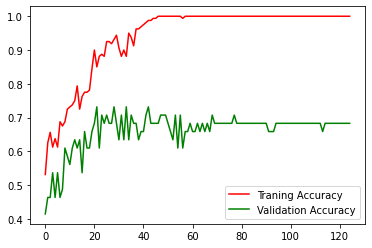

In [38]:
# View the training and validation loss 
plt.plot(hist.history["accuracy"],label='Traning Accuracy',color="r")
plt.plot(hist.history["val_accuracy"],label='Validation Accuracy',color="g")
plt.legend()
plt.show()

The graph clearly shows overfitting in the training process because the accuracy in the training dataset reaches 100% after about 50 epochs. The accuracy in the testing dataset is close to 70% after about 70 epochs. 

Below, we print out the confusion matrix, and the exact accuracy score.

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
pred_model=dnn.predict(X_test)
# Convert values between 0 and 1 to Y or N 
pred_yn = np.where(pred_model > 0.5, 1, 0)

ma5=confusion_matrix(y_test,pred_yn)
print("the confusion matrix is\n", ma5) 

# Print out the accuracy score
accuracy=accuracy_score(y_test,pred_yn)
print(f"the accuracy of the prediction is {accuracy}") 

2/2 [==============================] - 0s 6ms/step
the confusion matrix is
 [[17  7]
 [ 6 11]]
the accuracy of the prediction is 0.6829268292682927


The confusion matrix shows that the new model now predicts 17 true negative, 11 true positives, 7 false positives, and 6 false negatives. 

The accuracy score is 68.29%. 

This is quite an improvement over the predictions in Chapter 5, when we used only dense layers. If you recall, the accuracy score with only dense layers is 60.98%. 